In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('CDNOW.txt',sep='\s+',names=['id','date','quantity','amount'])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
data.describe()

,id,date,quantity,amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [2]:
print(pd.isnull(data).sum())

id          0
date        0
quantity    0
amount      0
dtype: int64


In [3]:
data['date'] = pd.to_datetime(data['date'],format='%Y%m%d')  
data = data.set_index('date',drop=True) #设置date为新索引，在源数据中drop掉date
month_grouped = data.resample('m').agg({'id':'count','quantity':'sum','amount':'sum'})#降采样，频率：月
month_grouped['user_sum']=data.resample('m')['id'].nunique()
print(month_grouped)

               id  quantity     amount  user_sum
date                                            
1997-01-31   8928     19416  299060.17      7846
1997-02-28  11272     24921  379590.03      9633
1997-03-31  11598     26159  393155.27      9524
1997-04-30   3781      9729  142824.49      2822
1997-05-31   2895      7275  107933.30      2214
1997-06-30   3054      7301  108395.87      2339
1997-07-31   2942      8131  122078.88      2180
1997-08-31   2320      5851   88367.69      1772
1997-09-30   2296      5729   81948.80      1739
1997-10-31   2562      6203   89780.77      1839
1997-11-30   2750      7812  115448.64      2028
1997-12-31   2504      6418   95577.35      1864
1998-01-31   2032      5278   76756.78      1537
1998-02-28   2026      5340   77096.96      1551
1998-03-31   2793      7431  108970.15      2060
1998-04-30   1878      4697   66231.52      1437
1998-05-31   1985      4903   70989.66      1488
1998-06-30   2043      5287   76109.30      1506


C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


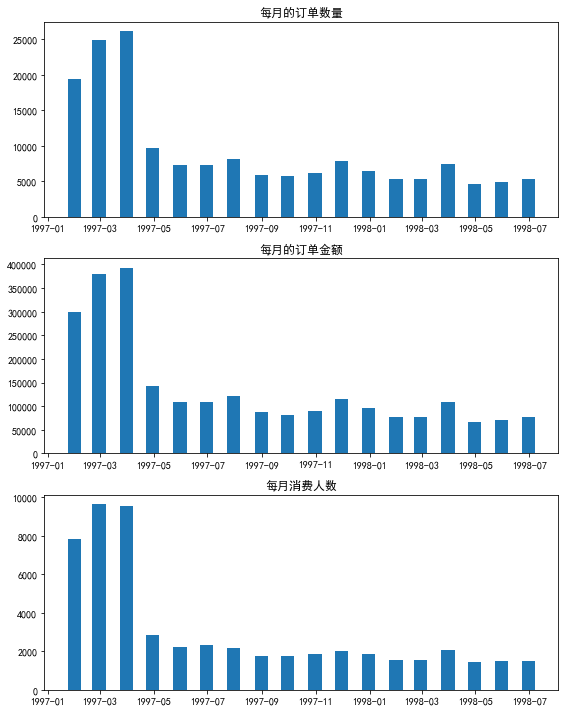

In [4]:

import pylab
pylab.rcParams['figure.figsize']=(8,10)#8为长，10为宽
fig,ax = plt.subplots(3,1)
ax[0].bar(list(month_grouped.index),month_grouped.quantity,width=15)
ax[0].set_title('每月的订单数量')
ax[1].bar(month_grouped.index,month_grouped.amount,width=15)
ax[1].set_title('每月的订单金额')
ax[2].bar(month_grouped.index,month_grouped.user_sum,width=15)
ax[2].set_title('每月消费人数')
plt.tight_layout() #合理填充界面
plt.show()

In [5]:
data.drop_duplicates('id')['id'].resample('m').count() 

date
1997-01-31    7846
1997-02-28    8476
1997-03-31    7248
Freq: M, Name: id, dtype: int64

In [6]:
user_grouped = data.groupby('id').agg({'id':'count', 'quantity':'sum','amount':'sum'})
user_grouped.describe()

,id,quantity,amount
count,23570.000000,23570.000000,23570.000000
mean,2.955409,7.122656,106.080426
std,4.736558,16.983531,240.925195
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,19.970000
50%,1.000000,3.000000,43.395000
75%,3.000000,7.000000,106.475000
max,217.000000,1033.000000,13990.930000


In [7]:
user_grouped[['quantity','amount']].head()

,quantity,amount
id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


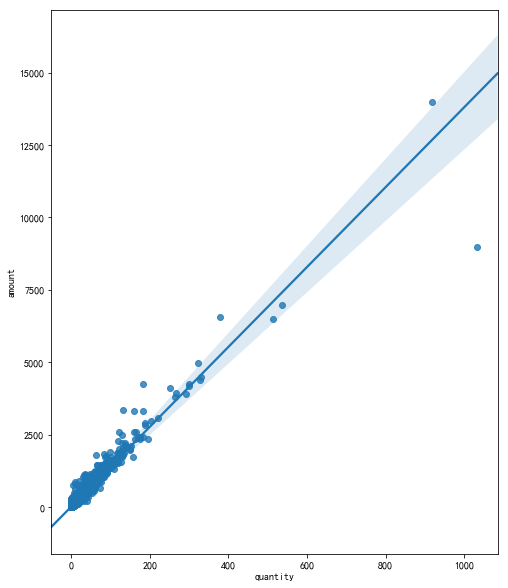

In [8]:
import seaborn as sns
sns.regplot('quantity','amount',data=user_grouped)

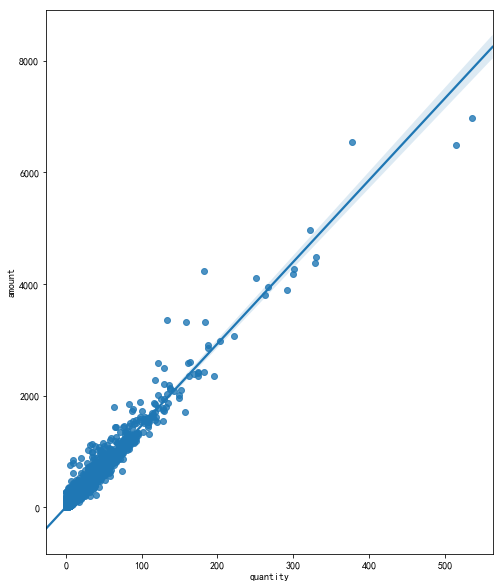

In [9]:
sns.regplot('quantity','amount',data=user_grouped.query('quantity<600'))

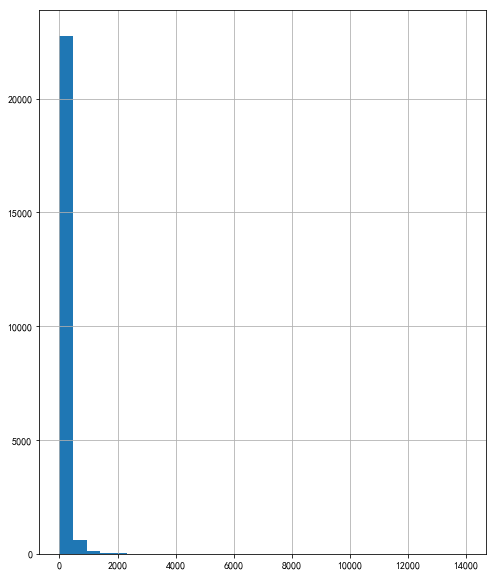

In [10]:
user_grouped['amount'].hist(bins=30)

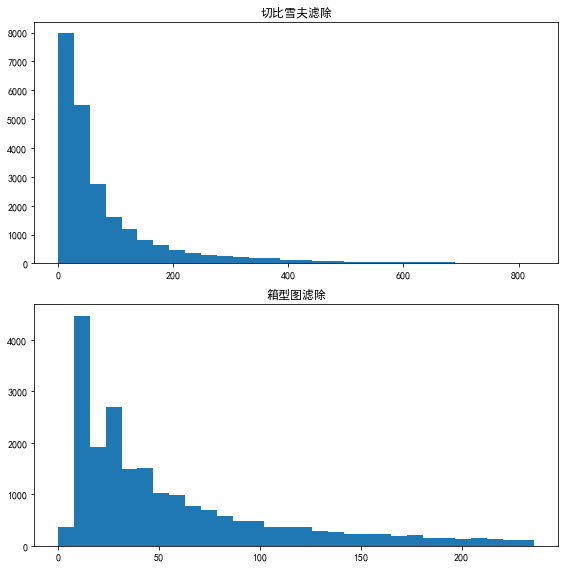

In [11]:

pylab.rcParams['figure.figsize']=(8,8)#8为长，10为宽
fig,ax = plt.subplots(2,1)
#根据切比雪夫定理，距离平均值有三个标准差的值均为异常值，即 106+241*3=829
ax[0].hist(user_grouped.query('amount<829')['amount'],bins=30)
ax[0].set_title('切比雪夫滤除')
#user_grouped.query('amount<829')['amount'].hist(bins=30)
#以箱型图Q3+1.5IQR为异常值截断点 106.5+1.5*（106.5-20）=236.25
ax[1].hist(user_grouped.query('amount<236.25')['amount'],bins=30)
ax[1].set_title('箱型图滤除')
plt.tight_layout() #合理填充界面

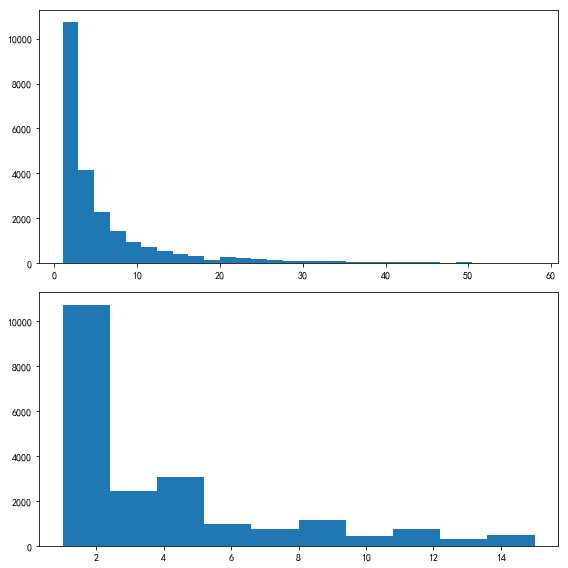

In [12]:
pylab.rcParams['figure.figsize']=(8,8)#8为长，10为宽
fig,ax = plt.subplots(2,1)
#根据切比雪夫定理，距离平均值有三个标准差的值均为异常值，
ax[0].hist(user_grouped.query('quantity<58.12')['quantity'],bins=30)
#user_grouped.query('amount<829')['amount'].hist(bins=30)
#以箱型图Q3+1.5IQR为异常值截断点 
ax[1].hist(user_grouped.query('quantity<16')['quantity'],bins=10)
plt.tight_layout() #合理填充界面

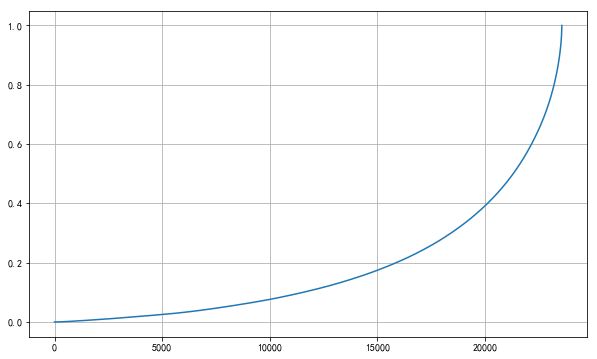

In [13]:
user_cumsum = user_grouped.sort_values('amount')
user_cumsum['amount_cumsum'] = user_cumsum.amount.cumsum()
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,len(user_cumsum)),user_cumsum['amount_cumsum']/user_cumsum['amount'].sum())
plt.grid()
plt.show()

# user_cumsum = user_grouped.sort_values('amount').apply(lambda x : x.cumsum()/x.sum())
# user_cumsum.reset_index(drop=True).amount.plot()
# plt.grid()

In [14]:
#重新设置索引，按列的固定顺序
data = data.reset_index()[['id','date','quantity','amount']]
#各用户最大单笔购买数量以及最大单笔消费金额
print(data.groupby('id').max()[['quantity','amount']].head())
print('*'*20)

#各用户购买次数
print(data['id'].value_counts().head())
print(data.groupby('id').count()['quantity'].head())

    quantity  amount
id                  
1          1   11.77
2          5   77.00
3          5   57.45
4          2   29.73
5          4   46.46
********************
14048    217
7592     201
7983     149
22061    143
3049     117
Name: id, dtype: int64
id
1     1
2     2
3     6
4     4
5    11
Name: quantity, dtype: int64


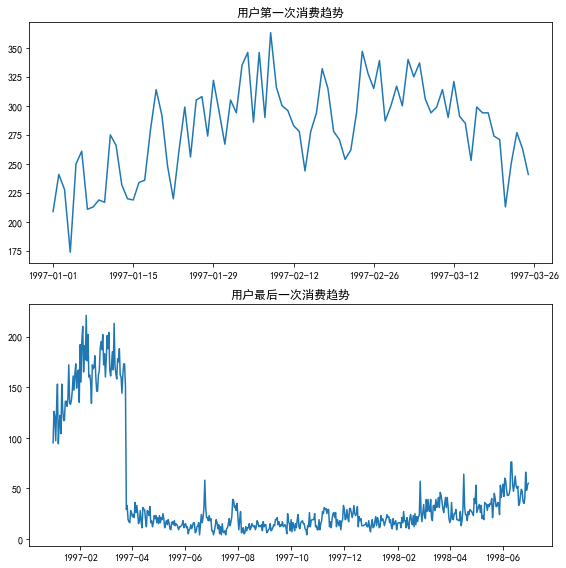

In [15]:
id_grouped = data.groupby('id')
#各用户第一次购买时间
first_buy = id_grouped['date'].min()
#各用户最后一次购买时间
last_buy = id_grouped['date'].max()

fig,ax = plt.subplots(2,1)
ax[0].plot(first_buy.value_counts().sort_index())
ax[0].set_title('用户第一次消费趋势')
ax[0].set_xticks(['1997-01-01','1997-01-15','1997-01-29','1997-02-12','1997-02-26','1997-03-12','1997-03-26'])
ax[0].set_xticklabels(['1997-01-01','1997-01-15','1997-01-29','1997-02-12','1997-02-26','1997-03-12','1997-03-26'])
ax[1].plot(last_buy.value_counts().sort_index())
ax[1].set_title('用户最后一次消费趋势')
plt.tight_layout()

In [16]:
from datetime import datetime
now=datetime.now()
#最后一次消费与当前时间间隔
print((now-last_buy).head())
print('*'*20)
#生命周期
user_cycle=last_buy - first_buy
print(user_cycle.describe())
print('*'*20)

id
1   8183 days 20:06:26.198408
2   8172 days 20:06:26.198408
3   7671 days 20:06:26.198408
4   7838 days 20:06:26.198408
5   7816 days 20:06:26.198408
Name: date, dtype: timedelta64[ns]
********************
count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: date, dtype: object
********************


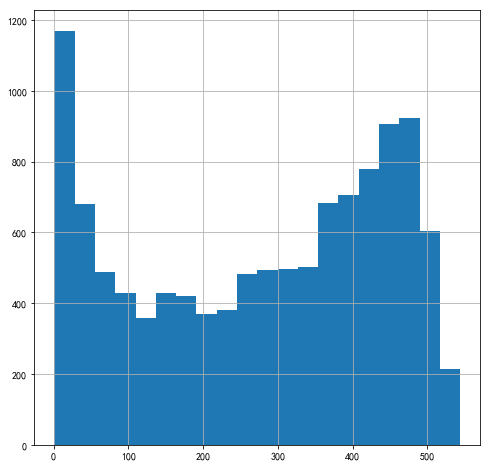

In [17]:
from datetime import timedelta
user_cycle = user_cycle/timedelta(1)
user_cycle[user_cycle>0].hist(bins=20)#滤除生命周期为0的用户

In [18]:
date_min = id_grouped.date.min()
#suffxes参数是如果合并的内容中有重名column，加上后缀。
first_back = pd.merge(left = data, right = date_min.reset_index(),how = 'inner', on = 'id',suffixes = ('', '_min'))
first_back['date_diff'] = first_back.date - first_back.date_min
#将日期转化为时间
first_back['date_diff'] = first_back.date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
first_back[first_back['date_diff']>0].groupby('id').min()['date_diff'].describe()

count    11516.000000
mean       110.995832
std        122.144701
min          1.000000
25%         18.000000
50%         57.000000
75%        171.000000
max        533.000000
Name: date_diff, dtype: float64

In [19]:
user_period = id_grouped.apply(lambda x:x.date-x.date.shift())
user_period.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: date, dtype: object

In [21]:
#复购率 尝试一下很傻的方法
df = data.reset_index(drop=True)
df.date=df.date.apply(lambda x:x.strftime(format='%Y%m'))#日期转str 改了格式 方便分组
df['date'] = pd.to_datetime(df['date'],format='%Y%m')  #str转日期 改了格式  下面有to_period转频率的方法
fugou_grouped = df.groupby(['date','id']).count()

x,y=[],[]
y_fenzi,y_fenmu,flag=0,0,0
for num,i in enumerate(fugou_grouped.index):
    #print(num,i[0],fugou_grouped.quantity[num])
    if i[0] not in x:
        x.append(i[0])
        if flag==1:
            y.append(y_fenzi/(y_fenzi+y_fenmu))
            y_fenzi,y_fenmu=0,0
        flag=1
        
    if fugou_grouped.quantity[num]>1:
        y_fenzi=y_fenzi+1
    else:
        y_fenmu=y_fenmu+1
        
    if num==len(fugou_grouped)-1:
        y.append(y_fenzi/(y_fenzi+y_fenmu))

params={
    'figure.figsize'   : '10, 6'
}
pylab.rcParams.update(params)

plt.bar(x,y,width=20)
plt.show()

KeyboardInterrupt: 

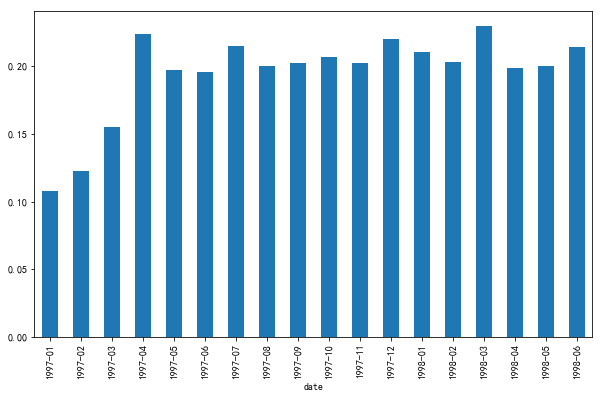

In [22]:
df = data.reset_index(drop=True)
df = df.set_index('date')
df = df.to_period(freq='M')#转换成月  上面的那种转成str再转datetime也可以
df = df.reset_index()

pivoted_count = df.pivot_table(index = 'id',
                               columns='date',
                               values = 'quantity',
                               aggfunc={'quantity':'count'})
pivoted_count = pivoted_count.fillna(0)#没有消费的先填充为0
df_purchase = pivoted_count.applymap(lambda x:1 if x>1 else np.nan if x==0 else 0)#清洗数据，消费超过两次为1，消费过1次为0，没有消费为nan
df_purchase.apply(lambda x:x.sum()/x.count()).plot.bar()

In [23]:

rfm = df.pivot_table(index = 'id',
                     values = ['date','quantity','amount'],
                     aggfunc = {'date':'max',
                                'quantity':'count',
                                'amount':'sum'})
rfm['R']=(rfm['date'].max() - rfm['date']) / timedelta(1)
rfm.rename(columns = {'amount':'M', 'quantity':'F'},inplace=True)
rfm=rfm[['R','F','M']]
rfm.head()

TypeError: unsupported operand type(s) for /: 'MonthEnd' and 'Timedelta'

In [24]:
def level_label(data):
    level = data.apply(lambda x:'1' if x>0 else '0')
    label = level['R']+level['F']+level['M']
    d = {
        
        '011':"高价值客户",
        '111':"重点保持客户",
        '001':"重点发展客户",
        '101':"重点挽留客户",
        '010':"潜在客户",
        '000':"新客有推广价值",
        '110':"一般保持客户",
        '100':"流失"
    }
    result = d[label]
    return result

rfm['label']=rfm.apply(lambda x:x-x.mean()).apply(level_label,axis=1)
print(rfm.groupby('label').sum())

TypeError: ('cannot perform mean with type period[M]', 'occurred at index date')

In [25]:
df_purchase_back=pivoted_count.applymap(lambda x:1 if x>0 else np.nan)
def purchase_back(data):
    lenth = len(data)
    state = []
    for i in range(0,lenth-1):
        if data[i] == 1:
            if data[i+1]==1:
                state.append(1) #若本月已消费，下个月也消费置1
            else:
                state.append(0) #本月已消费，下月未消费置0
        else:
            state.append(np.nan) #本月未消费置np.nan
    state.append(np.nan) #最后一个月置np.nan
    return pd.Series(state)

df_purchase_b = df_purchase_back.apply(purchase_back,axis=1) #传入df_purchase_back的每一行数据
df_purchase_b.columns = df_purchase_back.columns
df_purchase_b.apply(lambda x:x.sum()/x.count()).plot.bar()

NameError: name 'df_purchase_back' is not defined

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


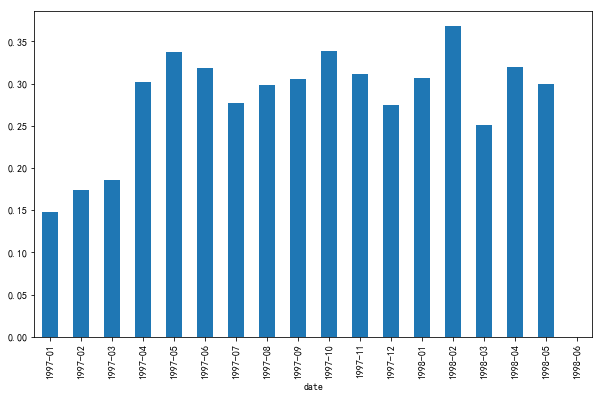

In [26]:
df_purchase_back=pivoted_count.applymap(lambda x:1 if x>0 else np.nan)
def purchase_back(data):
    lenth = len(data)
    state = []
    for i in range(0,lenth-1):
        if data[i] == 1:
            if data[i+1]==1:
                state.append(1) #若本月已消费，下个月也消费置1
            else:
                state.append(0) #本月已消费，下月未消费置0
        else:
            state.append(np.nan) #本月未消费置np.nan
    state.append(np.nan) #最后一个月置np.nan
    return pd.Series(state)

df_purchase_b = df_purchase_back.apply(purchase_back,axis=1) #传入df_purchase_back的每一行数据
df_purchase_b.columns = df_purchase_back.columns
df_purchase_b.apply(lambda x:x.sum()/x.count()).plot.bar()

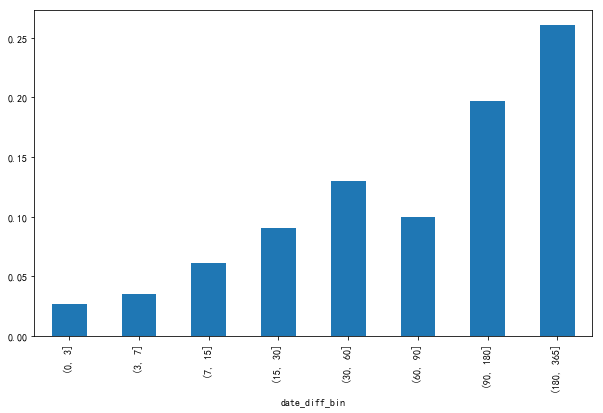

In [27]:
#利用首次回购日期的first_back
bin = [0,3,7,15,30,60,90,180,365]
first_back['date_diff_bin'] = pd.cut(first_back.date_diff, bins = bin)
pivoted_retention = first_back.pivot_table(index = 'id', columns = 'date_diff_bin',values = 'amount', aggfunc = sum, dropna = False)
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.mean().plot.bar()

In [28]:

rfm = df.pivot_table(index = 'id',
                     values = ['date','quantity','amount'],
                     aggfunc = {'date':'max',
                                'quantity':'count',
                                'amount':'sum'})
rfm['R']=(rfm['date'].max() - rfm['date']) / timedelta(1)
rfm.rename(columns = {'amount':'M', 'quantity':'F'},inplace=True)
rfm=rfm[['R','F','M']]
rfm.head()

TypeError: unsupported operand type(s) for /: 'MonthEnd' and 'Timedelta'

In [29]:

def level_label(data):
    level = data.apply(lambda x:'1' if x>0 else '0')
    label = level['R']+level['F']+level['M']
    d = {
        
        '011':"高价值客户",
        '111':"重点保持客户",
        '001':"重点发展客户",
        '101':"重点挽留客户",
        '010':"潜在客户",
        '000':"新客有推广价值",
        '110':"一般保持客户",
        '100':"流失"
    }
    result = d[label]
    return result

rfm['label']=rfm.apply(lambda x:x-x.mean()).apply(level_label,axis=1)
print(rfm.groupby('label').sum())

TypeError: ('cannot perform mean with type period[M]', 'occurred at index date')

In [30]:

rfm_pie = rfm.groupby('label').size()
pylab.rcParams['figure.figsize']=(7,7)
plt.title("各层用户占比")
plt.pie(rfm_pie,labels=rfm_pie.index,autopct = '%2.1f%%',startangle = 90)
#plt.legend(fancybox=True, loc='best')
plt.axis('equal')     # plot pyplot as circle
plt.tight_layout()  #tight_layout会自动调整子图参数，使之填充整个图像区域。

KeyError: 'label'